In [1]:
import os
os.getcwd()

'C:\\Users\\dell'

In [2]:
#advertising.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To load dataset
df=pd.read_csv("advertising.csv")
df.head()

Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [4]:
#to show the shape 
df.shape

(200, 5)

In [5]:
#to delete unwanted column permanently from existing dataframe
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [7]:
#EDA : Exploratory Data Analysis : It is cleaning process of data 
#1. to check null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
#cross check
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

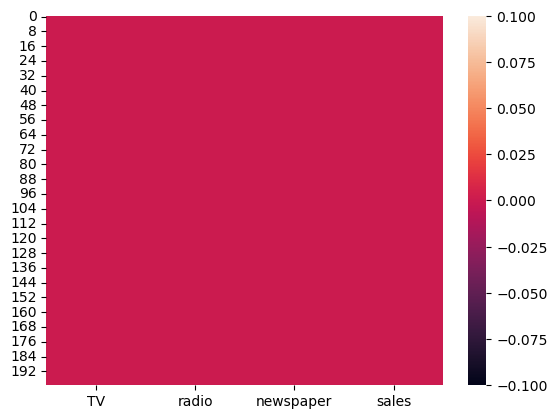

In [9]:
#visualise null values
sns.heatmap(df.isnull())
plt.show()

In [10]:
#To check duplicates rows
df.duplicated().sum()

0

In [11]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

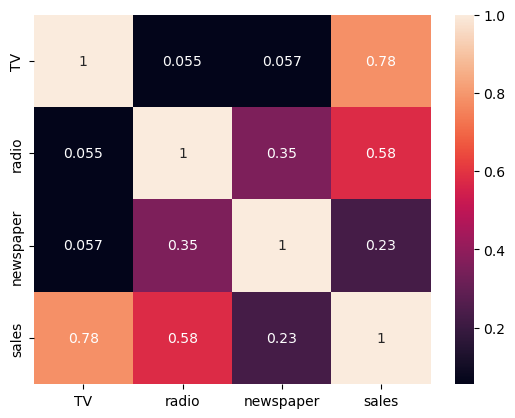

In [12]:
#check correlation coefficient between each inputs(TV,radio and newspaper) with output(sales)
#use inbuilt method corr() of numpy array 
sns.heatmap(df.corr(),annot=True) #annot means annotation means to show correlation's value
plt.show()

In [13]:
#clearly understood Inputs TV and rado both are imp to predict the outptu sales 
#and newspaper input is not imp to predict the output 
#select input and output from given dataframe
X=df[["TV","radio"]]  #or df.drop(["newspaper","sales"],axis=1) #input select [[]]
Y=df["sales"]  #output 1D []

In [14]:
#Here Multiple Linear Regression 
#Equation of line : Y_pred=m1*TV+m2*radio+c


In [15]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [16]:
X_train.shape,X_test.shape

((140, 2), (60, 2))

In [17]:
Y_train.shape,Y_test.shape

((140,), (60,))

In [18]:
X_train.head()

TV  radio
116  139.2   14.3
67   139.3   14.5
78     5.4   29.9
42   293.6   27.7
17   281.4   39.6

In [19]:
#Apply StandardScaler on input X-train,X_test
from sklearn.preprocessing import StandardScaler
#create the object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [20]:
type(X_train),type(X_test)

(numpy.ndarray, numpy.ndarray)

In [21]:
X_train

array([[-0.04063534, -0.58562079],
       [-0.03948046, -0.57246816],
       [-1.58586722,  0.44028424],
       [ 1.74250219,  0.29560533],
       [ 1.6016066 ,  1.07818673],
       [-1.54775611,  1.68978396],
       [-0.72201561, -1.52603374],
       [-0.05564881,  1.52537611],
       [ 0.97566066, -0.48697608],
       [-1.28444306,  0.09173958],
       [ 1.3856437 ,  0.36794479],
       [ 0.81744185,  1.30178142],
       [ 1.67320928,  1.30178142],
       [-1.51310966,  0.90062625],
       [-1.44150699,  0.94666045],
       [ 0.77240146, -0.17131299],
       [-1.37336896,  0.78225259],
       [-0.76590112, -1.47342322],
       [ 1.24936765,  0.87432099],
       [-0.01638282,  0.2364185 ],
       [ 0.52063722, -0.13843142],
       [-0.09722455, -1.20379434],
       [ 1.12117577, -1.25640485],
       [ 0.93870444, -1.36820219],
       [-0.77629506, -0.81579179],
       [-0.52222106, -1.02623385],
       [-0.77860482, -0.19104193],
       [-1.55122076,  0.26272376],
       [ 0.55874832,

In [22]:
#model perform with LinearRegression Algorithm 
from sklearn.linear_model import LinearRegression

In [23]:
#create the object of LinearRegression class
lr=LinearRegression()

In [24]:
#train the model with 70% data , use fit() inbuilt method of LinearRegression class
lr.fit(X_train,Y_train)

LinearRegression()

In [25]:
#Check slope/gradient of each input , use inbuilt attributes coef_  of LinearRegression class
lr.coef_

array([4.06756287, 2.70136813])

In [26]:
X.columns

Index(['TV', 'radio'], dtype='object')

In [27]:
#to check intercept , use inbuilt attributes intercept_ of LinearRegression class
lr.intercept_

13.79142857142857

In [28]:
#X_test

In [29]:
#test the model with 30% testing data ,use inbuilt method predict() of LinearRegression class
#Y_pred=m1*TV+m2*radio+intercept
Y_pred=lr.predict(X_test)

In [30]:
dict={'Actual output':Y_test,'Predicted output':Y_pred}
#converts into DataFrame
df1=pd.DataFrame(dict)
df1

Actual output  Predicted output
58            23.8         21.678675
40            16.6         16.438920
34             9.5          7.709037
102           14.8         17.921584
184           17.6         18.671115
198           25.5         23.748351
95            16.9         16.249628
4             12.9         13.376570
29            10.5          9.123648
168           17.1         17.275850
171           14.5         14.405139
18            11.3          9.857309
11            17.4         17.314027
89            16.7         16.614374
110           13.4         15.028579
118           15.9         15.424895
159           12.9         12.420215
35            12.8         17.348925
136            9.5         11.095709
59            18.4         18.103203
51            10.7          9.386556
16            12.5         12.651716
44             8.5          8.709470
94            11.5         10.497047
31            11.9         11.359424
162           14.9         15.030433
38            10.1          9.732680
28            18.9         19.466610
193           19.6         18.261607
27            15.9         17.210358
47            23.2         21.606694
165           11.9         14.584544
194           17.3         16.321362
177           11.7         12.345678
176           20.2         19.998536
97            15.5         15.381205
174           11.5         14.016140
73            11.0         10.056010
69            22.3         20.947920
172            7.6          7.456262
108            5.3          3.651207
107            8.7          7.264651
189            6.7          5.992780
14            19.0         18.397176
56             5.5          8.299666
19            14.6         14.130111
114           14.6         14.952296
39            21.5         20.372613
185           22.6         20.606789
124           19.7         19.483764
98            25.4         24.088197
123           15.2         14.894162
119            6.6          6.718500
53            21.2         19.749953
33            17.4         18.994481
179           12.6         12.520422
181           12.2         14.188236
106            7.2          6.093311
199           13.4         15.395585
138            9.6          9.585862

In [31]:
#Evaluation  of model
#find mean squared error , call inbuilt class mean_squared_error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
print("mean_squared_error : ",mse)

mean_squared_error :  1.9147050289721796


In [32]:
#find score of model 
#score() inbuilt method of LinearRegression class 
lr.score(X_test,Y_test) #testing score , it is similar to r2_score

0.9230321850256801

In [33]:
#or find r2_score 
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.9230321850256801

In [34]:
#Check model is underfit or overfit?
#check training score (X_train,Y_train)
lr.score(X_train,Y_train)

0.8849581188519494

In [35]:
#here Training score<testing score means model is under fit .
#in this problem : -  training score=.88 means 88%
#and testing score : - 0.92 means 92% 
#here training score<testing score (88%<92%) means model is underfit

#given input in this dataset : TV and radio  and output sales 
#if model is underfit then given inputs(X) in polynomial linear regression 
#call inbuilt class PolynomialFeatures 
from sklearn.preprocessing import PolynomialFeatures

In [36]:
#create the object of class PolynomialFeatures and pass the degree of input 
#pf=PolynomialFeatures(2) #2 means degree of input
pf=PolynomialFeatures(3) #m1*TV**3+m2*TV**2+m3*TV*1+....

In [37]:
X_poly=pf.fit_transform(X) #m1*TV**2=m2*TV+m3*radio**2+m4*radio+c
#fit_transform() inbuilt method of PolynomialFeatures class

In [38]:
X

TV  radio
0    230.1   37.8
1     44.5   39.3
2     17.2   45.9
3    151.5   41.3
4    180.8   10.8
..     ...    ...
195   38.2    3.7
196   94.2    4.9
197  177.0    9.3
198  283.6   42.0
199  232.1    8.6

[200 rows x 2 columns]

In [39]:
X_poly.shape

(200, 10)

In [40]:
#train test split
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [41]:
X_train.shape ,X_test.shape

((140, 10), (60, 10))

In [42]:
#create the object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [43]:
#Perform model with Linear Regression 
#create the object of LinearRegression class
lr=LinearRegression()

In [44]:
#train the model with 70% data,use inbuilt method fit() of Linear Regression class
lr.fit(X_train,Y_train)

LinearRegression()

In [45]:
#Test the model with 30% data , use predict() inbuilt method of LinearRegression class
Y_pred=lr.predict(X_test)

In [46]:
mse=mean_squared_error(Y_test,Y_pred)
print("mean_squared_error : ",mse)

mean_squared_error :  0.14469078646442315


In [47]:
#Testing score
lr.score(X_test,Y_test) #testing score

0.9941836818138715

In [50]:
#Or testing score
r2_score(Y_test,Y_pred).round(2)

0.99

In [51]:
#check model is overfit/underfit
#find the training score
lr.score(X_train,Y_train).round(2)

0.99

In [ ]:
#here model os perfect 
#score 99%